In [2]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

draws = np.genfromtxt (path_data+'draws.csv', delimiter=",")
draws[:5]

array([ 0.        ,  4.89653018,  2.77736834, 10.090751  ,  2.24835528])

[ 0.          4.89653018  2.77736834 10.090751    2.24835528]
1001


/tmp/ipykernel_108237/3120379031.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(draws, fill=True, palette='mako')


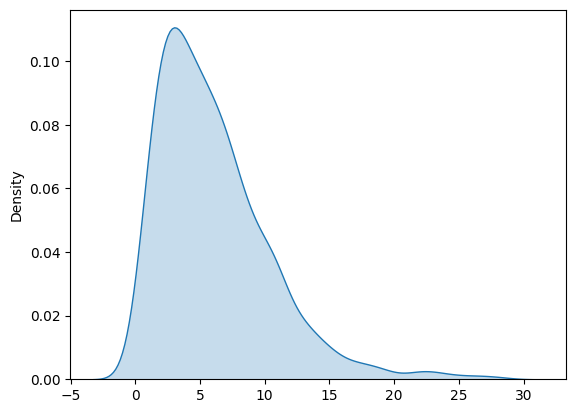

"\nWell done! Values larger than 30 are very unlikely, but they might occur with a non-zero probability. Let's now take a look at the core of Bayesian statistics: Bayes' Theorem!\n"

In [22]:
# exercise 01

"""
Probability distributions

Well done on the previous exercise! Now you have the general idea of what the Bayesian approach is all about. Among other things, you know that for a Bayesian, parameters of statistical models are random variables which can be described by probability distributions.

This exercise will test your ability to visualize and interpret probability distributions. You have been given a long list of draws from a distribution of the heights of plants in centimeters, contained in the variable draws. seaborn and matplotlib.pyplot have been imported for you as sns and plt, respectively. Time to get your hands dirty with data!
"""

# Instructions

"""

    Print the list of draws.
    Print the length of draws.
---

    Draw a density plot of draws, shading the distribution.
---
Based on the density plot you have just drawn, which of the following statements is false?
(It is impossible to observe a plant higher than 30cm)
"""

# solution

# Print the list of draws
print(draws[:5])

# Print the length of draws
print(len(draws))

# Plot the density of draws
sns.kdeplot(draws, fill=True, palette='mako')
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! Values larger than 30 are very unlikely, but they might occur with a non-zero probability. Let's now take a look at the core of Bayesian statistics: Bayes' Theorem!
"""

In [23]:
# exercise 02

"""
Let's play cards

You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability you've learned about in the last video, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.
"""

# Instructions

"""

    Calculate the probability of drawing a king or a queen, assign it to the variable p_king_or_queen and print it.
---
    Calculate the probability of drawing a numbered rank lesser than or equal to 5, assign it to the variable p_five_or_less and print it.
---
    Calculate the probability of drawing all four aces in a row, assign it to the variable p_four_acesand print it.

"""

# solution

# Calculate probability of drawing a king or queen
p_king_or_queen = 8/52
print(p_king_or_queen)

#----------------------------------#

# Calculate probability of drawing <= 5
p_five_or_less = 16/52
print(p_five_or_less)

#----------------------------------#

# Calculate probability of drawing four aces
p_all_four_aces = (4/52)**4
print(p_all_four_aces)

#----------------------------------#

# Conclusion

"""
Probably well done! The chance of drawing four aces straight is 0.00037%, so don't hope for it too much! Now that you're an expert in manipulating probabilities, let's take a look at Bayes' Theorem and how to use it to detect spam messages.
"""

0.15384615384615385
0.3076923076923077
3.501277966457758e-05


"\nProbably well done! The chance of drawing four aces straight is 0.00037%, so don't hope for it too much! Now that you're an expert in manipulating probabilities, let's take a look at Bayes' Theorem and how to use it to detect spam messages.\n"

In [24]:
emails = pd.read_csv(path_data+'emails.csv')
emails.head()

,spam,contains_3_excl
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [25]:
# exercise 03

"""
Bayesian spam filter

Well done on the previous exercise! Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: spam detection.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! Hence you've prepared a DataFrame called emails with two variables: spam, whether the email was spam, and contains_3_exlc, whether it contains the string "!!!". The head of the data looks like this:

     spam    contains_3_excl
0    False             False
1    False             False
2    True              False
3    False             False
4    False             False

Your job is to calculate the probability of the email being spam given that it contains three exclamation marks. Let's tackle it step by step! Here is Bayes' formula for your reference:

P(A|B) = (P(B|A) * P(A)) / P(B)
"""

# Instructions

"""

    Calculate the unconditional probability of the email being spam, assign it to the variable p_spam and print it.
---

    Calculate the unconditional probability of the email containing "!!!", assign it to the variable p_3_excl and print it.
---

    Calculate the probability of the email containing "!!!" given that it is spam, assign it to the variable p_3_excl_given_spam and print it.
---

    Calculate the probability of the email being spam given that it contains "!!!", assign it to the variable p_spam_given_3_excl and print it.

"""

# solution

# Calculate and print the unconditional probability of spam
p_spam = emails["spam"].mean()
print(p_spam)

# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails["contains_3_excl"].mean()
print(p_3_excl)

# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails.loc[emails["spam"]]["contains_3_excl"].mean()
print(p_3_excl_given_spam)

# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = p_3_excl_given_spam * p_spam / p_3_excl
print(p_spam_given_3_excl)

#----------------------------------#

# Conclusion

"""
Good job! If an email contains the '!!!', you can be 85% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!
"""

0.24390243902439024
0.17073170731707318
0.6
0.857142857142857


"\nGood job! If an email contains the '!!!', you can be 85% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!\n"

In [27]:
# exercise 04

"""
What does the test say?

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people suffer from it.

The test result came back positive. What is the probability that the patient is indeed sick? You can use Bayes' Theorem to answer this question. Here is what you should calculate:

P(Sick | Positive) = P(Positive | Sick) * P(Sick) / P(Positive)

Feel free to do the calculations in the console.
"""

# Instructions

"""
A: The patient is sick.
B: The test result is positive.
"""

# solution

P_A = 1/1000
P_BA = 0.99 # Positive and Sick (Positive Given Sick)
P_B = 0.02 # Negative and Sick (Negative given sick)

P_AB = P_BA * P_A / P_B

print(P_AB)

#----------------------------------#

# Conclusion

"""
Correct! Not very intuitive, is it? Even though the test is great at discovering the disease and raises false alarms rather seldom, a positive result means only a 5% probability that the patient is sick! Let's move forward to the final lesson of Chapter 1, where you will see a Bayesian statistical model in action!
"""

0.049499999999999995


"\nCorrect! Not very intuitive, is it? Even though the test is great at discovering the disease and raises false alarms rather seldom, a positive result means only a 5% probability that the patient is sick! Let's move forward to the final lesson of Chapter 1, where you will see a Bayesian statistical model in action!\n"

In [28]:
def get_heads_prob(tosses):
    num_heads = np.sum(tosses)
    return np.random.beta(num_heads + 1, 
                          len(tosses) - num_heads + 1, 
                          1000)

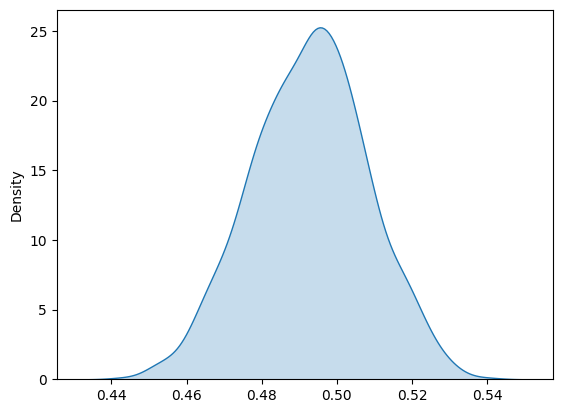

"\nWell done! The density plot peaks around 50%, indicating that the model has estimated the heads probability well. Now that you're familiar with get_heads_prob(), let's explore it in more detail in the next exercise!\n"

In [30]:
# exercise 05

"""
Tossing a coin

In the video, you have seen our custom get_heads_prob() function that estimates the probability of success of a binomial distribution. In this exercise, you will use it yourself and verify whether it does its job well in a coin-flipping experiment.

Watch out for the confusion: there are two different probability distributions involved! One is the binomial, which we use to model the coin-flipping. It's a discrete distribution with two possible values (heads or tails) parametrized with the probability of success (tossing heads). The Bayesian estimate of this parameter is another, continuous probability distribution. We don't know what kind of distribution it is, but we can estimate it with get_heads_prob() and visualize it.

numpy and seaborn have been imported for you as np and sns, respectively.
"""

# Instructions

"""

    Generate a list of 1000 coin tosses (0s and 1s) with 50% chance of tossing heads, and assign to the variable tosses.
    Use the tosses and the get_heads_prob() function to estimate the heads probability, and assign the result to heads_prob.
    Draw a density plot of the distribution of the heads probability you have just estimated.


"""

# solution

# Generate 1000 coin tosses
tosses = np.random.binomial(1, 0.5, 1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, fill=True, label="heads probabilty")
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! The density plot peaks around 50%, indicating that the model has estimated the heads probability well. Now that you're familiar with get_heads_prob(), let's explore it in more detail in the next exercise!
"""

/tmp/ipykernel_108237/362121947.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_nodata, shade=True, label="no data")


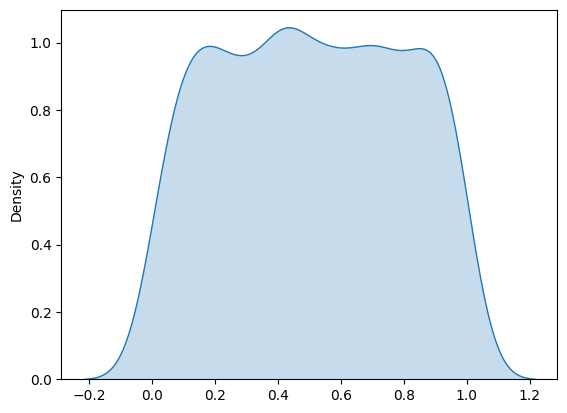

/tmp/ipykernel_108237/362121947.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")


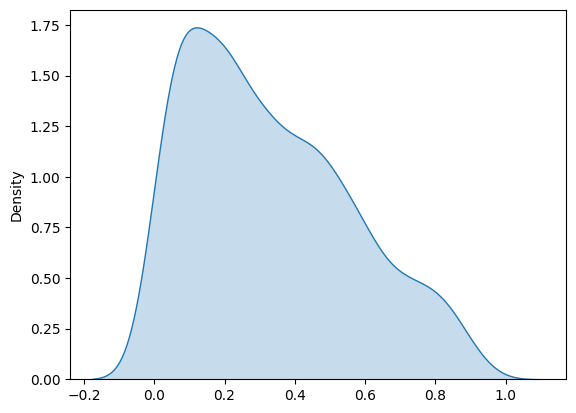

/tmp/ipykernel_108237/362121947.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")


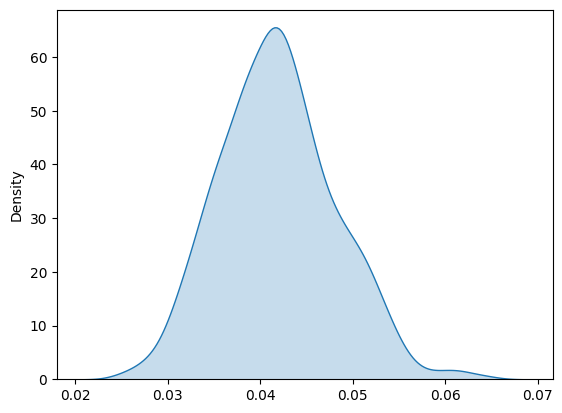

"\nThat's interesting! With no data, each possible value of the heads probabilty is equally likely! That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!\n"

In [31]:
# exercise 06

"""
The more you toss, the more you learn

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say? Let's find out! numpy and seaborn have been imported for you as np and sns, respectively.
"""

# Instructions

"""

    Estimate the heads probability using get_heads_prob() based on an empty list, assign the result to heads_prob_nodata and visualize it on a density plot.
---
    Do the same, this time based on a single tails (a list with a single 0) and assigning the result to heads_prob_onetails.
---
    Generate a list of 1000 tosses with a biased coin which comes up heads only 5% of all times and assign the result to biased_tosses.
    Estimate the heads probability based on biased_tosses, assign the result to heads_prob_biased and visualize it on a density plot.

"""

# solution

# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob([])
sns.kdeplot(heads_prob_nodata, shade=True, label="no data")
plt.show()

#----------------------------------#

# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob([0])
sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")
plt.show()

#----------------------------------#

# Estimate and plot heads probability based on 1000 tosses with a biased coin
biased_tosses = np.random.binomial(1,0.05,1000)
heads_prob_biased = get_heads_prob(biased_tosses)
sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")
plt.show()

#----------------------------------#

# Conclusion

"""
That's interesting! With no data, each possible value of the heads probabilty is equally likely! That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!
"""

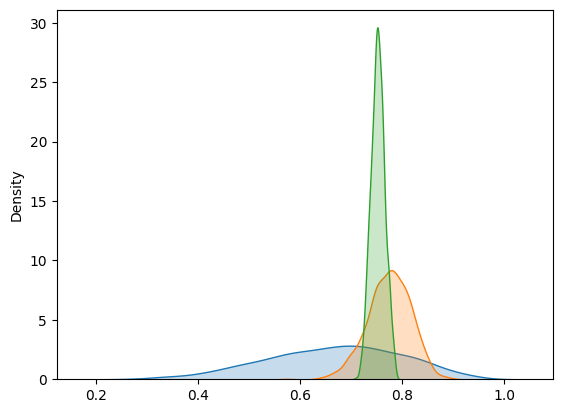

"\nFantastic job! You just finished chapter 1! You're right refusing to play with this particular coin. The chance it comes up heads is 75% to be precise, and the model got it right - having seen all 1000 tosses, the estimated distribution peaks at 0.75. With smaller data samples, however, the model didn't have the chance to learn the true value. You can see how uncertain it is from the width of the corresponding distributions. Are you curious how this model works, and how it updates its estimates with more data? Head off to Chapter 2 to find out! \n"

In [36]:
# exercise 07

"""
Hey, is this coin fair?

In the last two exercises, you have examined the get_heads_prob() function to discover how the model estimates the probability of tossing heads and how it updates its estimate as more data comes in.

Now, let's get down to some serious stuff: would you like to play coin flipping against your friend? She is willing to play, as long as you use her special lucky coin. The tosses variable contains a list of 1000 results of tossing her coin. Will you play?

In this exercise, you will be doing some plotting with the seaborn package again, which has been imported for you as sns.
"""

# Instructions

"""

    Assign the first 10 and the first 100 tosses to the variables tosses_first_10 and tosses_first_100, respectively.
---

    Use get_heads_prob() to obtain the probability of tossing a head for the first 10, first 100, and all tosses, assigning the results to heads_prob_first_10, heads_prob_first_100, and heads_prob_all, respectively.
---

    Plot the density of head probability for each subset of tosses, passing "first_10", "first_100", and "all" as the respective label argument.
---
Look at the plot you have just generated. Which of the statements below is false?
(The model allowed the possibility that the coin is fair after seeing the first 10 tosses.)
"""

# solution
tosses = np.random.binomial(1,0.75, 1000)
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses[:10]
tosses_first_100 = tosses[:100]

# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses)

# Plot density of head probability for each subset of tosses
sns.kdeplot(heads_prob_first_10, fill=True, label='first_10')
sns.kdeplot(heads_prob_first_100, fill=True, label='first_100')
sns.kdeplot(heads_prob_all, fill=True, label='all')
plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic job! You just finished chapter 1! You're right refusing to play with this particular coin. The chance it comes up heads is 75% to be precise, and the model got it right - having seen all 1000 tosses, the estimated distribution peaks at 0.75. With smaller data samples, however, the model didn't have the chance to learn the true value. You can see how uncertain it is from the width of the corresponding distributions. Are you curious how this model works, and how it updates its estimates with more data? Head off to Chapter 2 to find out! 
"""